In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

# Zad
Wygenerujmy punkty w kształcie prostej.

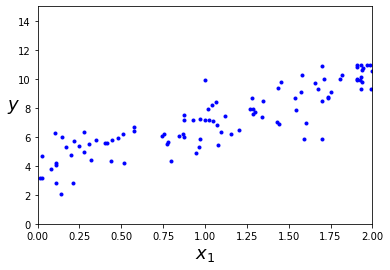

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

# Zad 
Wyznacz parametry prostej regresji (najmniejszych kwadratów) ze wzoru:

$$
\theta= (X^TX)^{-1}  X^T  y; 
$$

gdzie 
$$
X = 
\begin{bmatrix}
1, x_1 \\
1, x_2 \\
\vdots, \vdots \\
1, x_n \\
\end{bmatrix}
$$

Zwizualizuj wynik.

In [3]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[3.8626512 ],
       [3.12462428]])

In [6]:
X_new=np.linspace(0,2)
y_predict=np.c_[np.ones((len(X_new),1)), X_new] @ theta_best

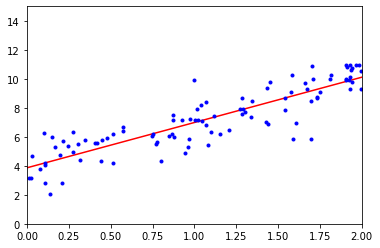

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# Zad.
Prównaj z wynikiem funkcji:
```python
LinearRegression()
```

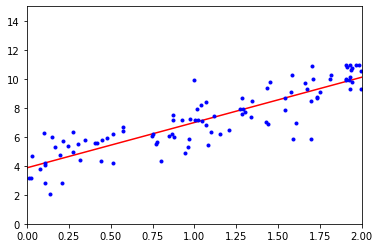

In [10]:
from sklearn.linear_model import LinearRegression

lin=LinearRegression()
lin.fit(X,y)
y_new_predict=lin.predict(X_new.reshape(-1, 1))
plt.plot(X_new, y_new_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# Zad.
Wykonaj algorytm minimalizacji gradientowej (w prostej petli).
Wykorzystaj pochodną.

Funkcja kosztu regresji:
$$
MSE(X;\theta) = \frac{1}{m} \sum ( \theta^T x_i - y_i  )^2.
$$

Pochodna funkcja kosztu regresji:

$$
\frac{\partial}{\partial \theta_j}MSE(X;\theta) = \frac{2}{m} \sum ( \theta^T x_i - y_i  )^2 x_i^{j}.
$$

Czyli gradient wynosi:

$$
\nabla_{\theta}MSE(X;\theta) = 
\begin{bmatrix}
    \frac{\partial}{\partial \theta_0}MSE\\
    \frac{\partial}{\partial \theta_1}MSE\\
    \vdots \\
    \frac{\partial}{\partial \theta_d}MSE
\end{bmatrix}
=
\frac{2}{m} X^T(\theta^TX - Y  ).
$$

Metoda gradientowa

$$
\theta^{\small \mbox{Nex step}} = \theta - \eta \nabla_{\theta} MSE
$$

### Zapisz wszystkie $\theta$ w liście 

In [11]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100
theta_path_bgd = []

theta_0 = np.random.randn(2,1)  # random initialization

theta = theta_0




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
#%matplotlib notebook

plt.close('all')

fun = lambda x,y: 4*x**2+y**2

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-7, 7, 0.25)
Y = np.arange(-7, 7, 0.25)
X, Y = np.meshgrid(X, Y)
Z = fun(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0.01, antialiased=True, alpha=0.3)


#####################################

def step_gradient_2d(x_current, y_current, learningRate):
    x_gradient = 8*x_current
    y_gradient = 2*y_current
    
    new_x = x_current-learningRate*x_gradient
    new_y = y_current-learningRate*y_gradient
    
    ax.quiver(x_current, y_current, (fun(x_current, y_current)) ,
              - (learningRate * x_gradient), - (learningRate * y_gradient), 
              (-(fun(x_current,y_current)-fun(new_x,new_y)))) 
    
    return [new_x, new_y]

def gradient_descent_runner_2d(starting_x, starting_y, learning_rate, num_iterations):
    x = starting_x
    y = starting_y
    for i in range(num_iterations):
        x, y = step_gradient_2d(x, y, learning_rate)
        #print(x, y)
    return [x, y]


learning_rate = 0.2
initial_x = 5 # initial y-intercept guess
initial_y = 0 # initial slope guess
num_iterations = 10
[x, y] = gradient_descent_runner_2d(initial_x, initial_y, learning_rate, num_iterations)


#####################################

plt.plot([initial_x],[initial_y],[fun(initial_x,initial_y)],"ok")
plt.show()

[[4.09233193]
 [3.17205943]]


# Zad
Zaimplemrntu Stochastic Gradient Descent.

### Zapisz wszystkie $\theta$ w liście 

In [ ]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [ ]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = theta_0


[[4.56308925]
 [3.08139533]]


# Zad
Zaimplemrntu Mini-batch gradient descent

### Zapisz wszystkie $\theta$ w liście 

In [ ]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

theta = theta_0

In [ ]:
print(theta)

# Zad
Narysuj jak zmieniały parametr w różnych metodach.

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

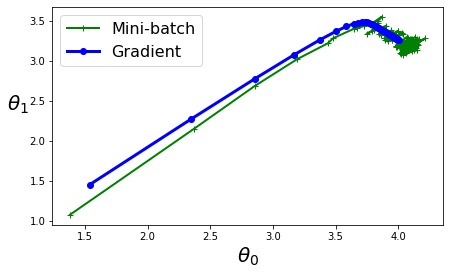